In [1]:
import cobra
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from pathlib import Path
import sys
sys.path.append('../code/')
import leakage, utils
import seaborn as sns
from matplotlib import cm, colors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

# Plot distribution of concentrations

In [2]:
# E coli
folder = Path("../data/{0}/".format('e_coli'))
ec_df_exo, _ = leakage.get_concentrations(folder, 'e_coli')
log_ec_df_exo = np.log10(ec_df_exo)
log_ec_df_exo.replace([-np.inf, np.inf], np.nan, inplace = True)


/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [3]:
log_ec_df_exo.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 26], dtype='int64', name='Time')

Text(0.5, 1.0, 'E. coli exometabolome concentrations')

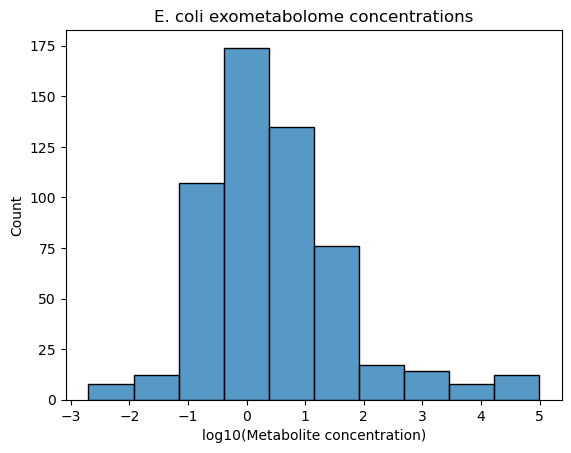

In [41]:
sns.histplot(np.array(log_ec_df_exo.loc[:,:]).flatten(), legend = False, bins=10)
plt.xlabel("log10(Metabolite concentration)")
plt.title('E. coli exometabolome concentrations')

/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Yeast exometabolome concentrations')

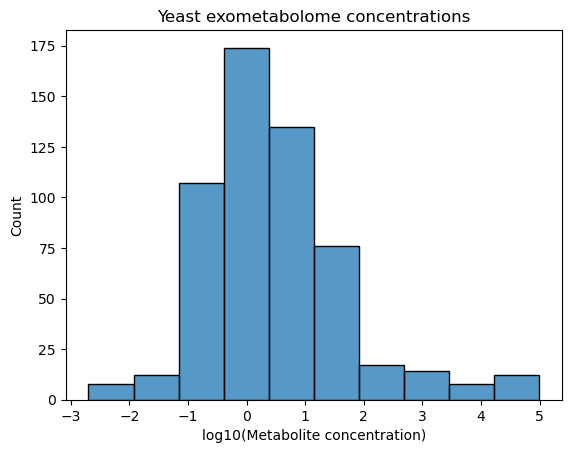

In [42]:
# yeast
folder = Path("../data/{0}/".format('yeast'))
yeast_df_exo, _ = leakage.get_concentrations(folder, 'yeast')
log_yeast_df_exo = np.log10(yeast_df_exo)
log_yeast_df_exo.replace([-np.inf, np.inf], np.nan, inplace = True)
sns.histplot(np.array(log_yeast_df_exo.loc[:,:]).flatten(), legend = False, bins=10)
plt.xlabel("log10(Metabolite concentration)")
plt.title('Yeast exometabolome concentrations')

/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'B. licheniformis exometabolome concentrations')

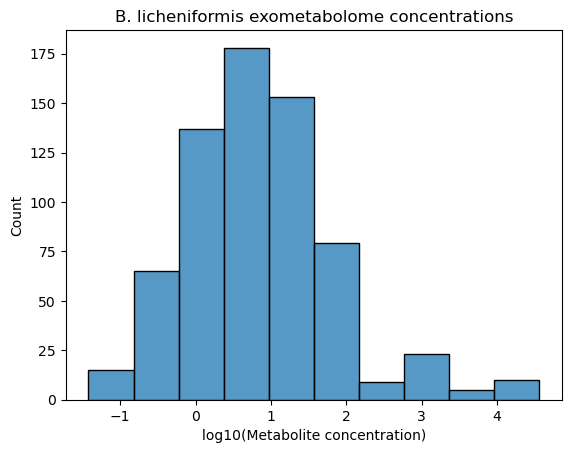

In [43]:
# yeast
folder = Path("../data/{0}/".format('b_licheniformis'))
bl_df_exo, _ = leakage.get_concentrations(folder, 'b_licheniformis')
log_bl_df_exo = np.log10(bl_df_exo)
log_bl_df_exo.replace([-np.inf, np.inf], np.nan, inplace = True)
sns.histplot(np.array(log_bl_df_exo.loc[:,:]).flatten(), legend = False, bins=10)
plt.xlabel("log10(Metabolite concentration)")
plt.title('B. licheniformis exometabolome concentrations')

/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'C. glutamicum exometabolome concentrations')

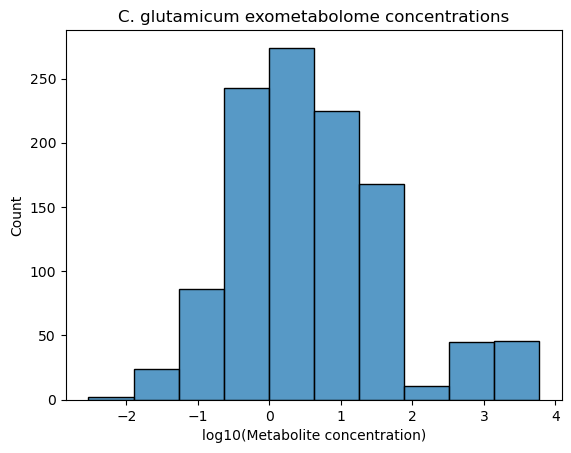

In [44]:
# yeast
folder = Path("../data/{0}/".format('c_glutamicum'))
cg_df_exo, _ = leakage.get_concentrations(folder, 'c_glutamicum')
log_cg_df_exo = np.log10(cg_df_exo)
log_cg_df_exo.replace([-np.inf, np.inf], np.nan, inplace = True)
sns.histplot(np.array(log_cg_df_exo.loc[:,:]).flatten(), legend = False, bins=10)
plt.xlabel("log10(Metabolite concentration)")
plt.title('C. glutamicum exometabolome concentrations')

In [39]:
log_cg_df_exo.index

Int64Index([  0,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
             23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  34,  36,  38,
             40,  42,  44,  46,  48,  50,  52,  56,  60,  64,  68,  72,  76,
             80,  86,  92,  98, 104, 110, 116, 128, 140, 152, 164, 182, 227,
            229],
           dtype='int64', name='Time')

# Plot intracellular concentrations

# Plot disitrbutions of leakage rates and shadow prices

For each fo the 4 species:
- plot the disitrbution of leakage rates
- plot the distribution of (median) shadow prices
- Evaluate their normality


In [50]:
def params_to_fn(species, timestr, only_significant_changes = False, knock_outs = False,
    shadow_price_for_leaked_mets = True, ):
    #################
    if only_significant_changes:
        s1 = '_osc'
    else:
        s1 = ''

    if shadow_price_for_leaked_mets:
        s2 = '_SP_for_leaked'
    else:
        s2 = ''

    if knock_outs:
        s3 = '_KO'
    else:
        s3 = ''
        
    folder = Path('../results/{0}/'.format(species))
    fn = 'spreadsheet_{0}_leakage_{1}{2}{3}{4}.csv'.format(species, timestr, s1, s2, s3)
    return folder / fn

# Load data

## E. coli

In [51]:
# timepoints = np.arange(4.5, 9, 1)
species = 'e_coli'
ec_timestr = '20230703'#'20230629'
path = params_to_fn(species, ec_timestr, only_significant_changes=False, knock_outs=False, shadow_price_for_leaked_mets=True)
ec_df = pd.read_csv(path, index_col = 0)
ec_df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Yeast

In [52]:
# df = pd.read_csv('spreadsheet_ecoli_leakage_and_info_230626_owd_significant.csv', index_col = 0)

# timepoints = np.arange(0.5, 12, 1)
species = 'yeast'
yeast_timestr = '20230705'
path = params_to_fn(species, yeast_timestr, only_significant_changes=False, knock_outs=False, shadow_price_for_leaked_mets=True)
yeast_df = pd.read_csv(path, index_col = 0)
yeast_df.replace([np.inf, -np.inf], np.nan, inplace=True)

## B. licheniformis

In [53]:
# timepoints = np.arange(1.5, 17, 1)

species = 'b_licheniformis'
bl_timestr = '20230704'

path = params_to_fn(species, bl_timestr, only_significant_changes=False, knock_outs=False, shadow_price_for_leaked_mets=True)
bl_df = pd.read_csv(path, index_col = 0)
bl_df.replace([np.inf, -np.inf], np.nan, inplace=True)

## C. glutamicum

In [54]:
# df = pd.read_csv('spreadsheet_ecoli_leakage_and_info_230626_owd_significant.csv', index_col = 0)
# timepoints = np.arange(1.5, 18, 1)
species = 'c_glutamicum'
cg_timestr = '20230717'
path = params_to_fn(species, cg_timestr, only_significant_changes=False, knock_outs=False, shadow_price_for_leaked_mets=True)
cg_df = pd.read_csv(path, index_col = 0)
cg_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot leakage distributions

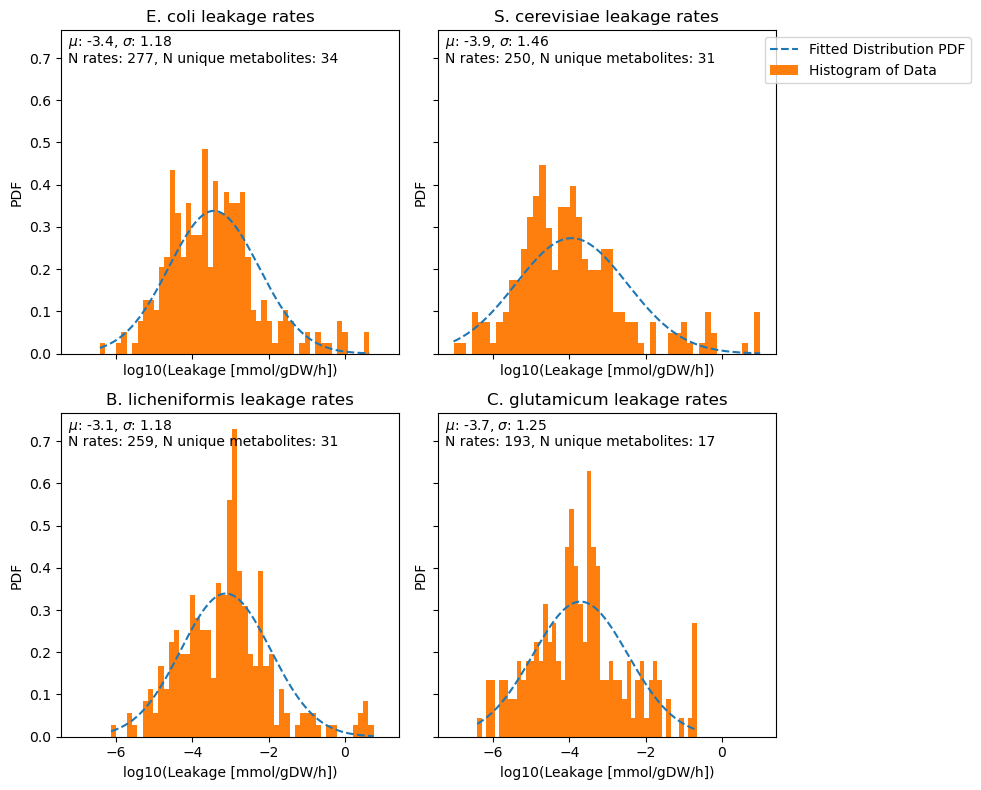

In [55]:
fig, axes = plt.subplots(2,2, figsize = (10,8), sharex = True, sharey = True)

# Distribution
dist = st.norm

# E.coli
ec_df_nan = ec_df.reset_index().dropna(subset = ['log10(Leakage [mmol/gDW/h])'])
# sns.histplot(data = ec_df_nan, x = 'log10(Leakage [mmol/gDW/h])', bins = 30, ax = axes[0,0])#, hue = 'Time', fill = False)#histplot
ec_fit = st.fit(dist, ec_df_nan['log10(Leakage [mmol/gDW/h])'], bounds=[[-6, -2], [0, 4]])
ec_fit.plot(ax = axes[0,0])
ec_norm = st.normaltest(ec_df_nan['log10(Leakage [mmol/gDW/h])'])
axes[0,0].text(0.02, 0.95, r"$\mu$: {0:.1f}, $\sigma$: {1:.2f}".format(ec_fit.params.loc, ec_fit.params.scale),  transform=axes[0,0].transAxes, horizontalalignment='left')
axes[0,0].text(0.02, 0.9, r"N rates: {0}, N unique metabolites: {1}".format(len(ec_df_nan), len(ec_df_nan['Metabolite name'].unique())),  transform=axes[0,0].transAxes, horizontalalignment='left')

# axes[0,0]
axes[0,0].get_legend().remove()


yeast_df_nan = yeast_df.reset_index().dropna(subset = ['log10(Leakage [mmol/gDW/h])'])
# sns.histplot(data = yeast_df_nan, x = 'log10(Leakage [mmol/gDW/h])', bins = 30, ax = axes[0,1])#, hue = 'Time', fill = False)#histplot
yeast_fit = st.fit(dist, yeast_df_nan['log10(Leakage [mmol/gDW/h])'], bounds=[[-6, -2], [0, 4]])
yeast_fit.plot(ax = axes[0,1])
yeast_norm = st.normaltest(yeast_df_nan['log10(Leakage [mmol/gDW/h])'])
axes[0,1].text(0.02, 0.95, r"$\mu$: {0:.1f}, $\sigma$: {1:.2f}".format(yeast_fit.params.loc, yeast_fit.params.scale),  transform=axes[0,1].transAxes, horizontalalignment='left')
axes[0,1].text(0.02, 0.9, r"N rates: {0}, N unique metabolites: {1}".format(len(yeast_df_nan), len(yeast_df_nan['Metabolite name'].unique())),  transform=axes[0,1].transAxes, horizontalalignment='left')

l = axes[0,1].get_legend()#.remove()
l.set_transform(axes[0,1].transAxes)
l.set_bbox_to_anchor((1.6, 1))

bl_df_nan = bl_df.reset_index().dropna(subset = ['log10(Leakage [mmol/gDW/h])'])
# sns.histplot(data = bl_df_nan, x = 'log10(Leakage [mmol/gDW/h])', bins = 30, ax = axes[1,0])#, hue = 'Time', fill = False)#histplot
bl_fit = st.fit(dist, bl_df_nan['log10(Leakage [mmol/gDW/h])'], bounds=[[-6, -2], [0, 4]])
bl_fit.plot(ax = axes[1,0])
bl_norm = st.normaltest(bl_df_nan['log10(Leakage [mmol/gDW/h])'])
axes[1,0].text(0.02, 0.95, r"$\mu$: {0:.1f}, $\sigma$: {1:.2f}".format(bl_fit.params.loc, bl_fit.params.scale),  transform=axes[1,0].transAxes, horizontalalignment='left')
axes[1,0].text(0.02, 0.9, r"N rates: {0}, N unique metabolites: {1}".format(len(bl_df_nan), len(bl_df_nan['Metabolite name'].unique())),  transform=axes[1,0].transAxes, horizontalalignment='left')

axes[1,0].get_legend().remove()


cg_df_nan = cg_df.reset_index().dropna(subset = ['log10(Leakage [mmol/gDW/h])'])
# sns.histplot(data = cg_df_nan, x = 'log10(Leakage [mmol/gDW/h])', bins = 30, ax = axes[1,1])#, hue = 'Time', fill = False)#histplot
cg_fit = st.fit(dist, cg_df_nan['log10(Leakage [mmol/gDW/h])'], bounds=[[-6, -2], [0, 4]])
cg_fit.plot(ax = axes[1,1])
cg_norm = st.normaltest(cg_df_nan['log10(Leakage [mmol/gDW/h])'])

axes[1,1].text(0.02, 0.95, r"$\mu$: {0:.1f}, $\sigma$: {1:.2f}".format(cg_fit.params.loc, cg_fit.params.scale),  transform=axes[1,1].transAxes, horizontalalignment='left')
axes[1,1].text(0.02, 0.9, r"N rates: {0}, N unique metabolites: {1}".format(len(cg_df_nan), len(cg_df_nan['Metabolite name'].unique())),  transform=axes[1,1].transAxes, horizontalalignment='left')

axes[1,1].get_legend().remove()


axes[0,0].set_title('E. coli leakage rates')
axes[0,1].set_title('S. cerevisiae leakage rates')
axes[1,0].set_title('B. licheniformis leakage rates')
axes[1,1].set_title('C. glutamicum leakage rates')

axes[0,0].set_xlabel('log10(Leakage [mmol/gDW/h])')
axes[0,1].set_xlabel('log10(Leakage [mmol/gDW/h])')
axes[1,0].set_xlabel('log10(Leakage [mmol/gDW/h])')
axes[1,1].set_xlabel('log10(Leakage [mmol/gDW/h])')

plt.tight_layout()

# l.set_transform(axes[1,])

In [56]:
st.ttest_ind(ec_df_nan['log10(Leakage [mmol/gDW/h])'], bl_df_nan['log10(Leakage [mmol/gDW/h])'], equal_var=False)

Ttest_indResult(statistic=-3.0500307863038287, pvalue=0.002402238239357088)

In [57]:
# st.kstest(ec_df_nan['log10(Leakage [mmol/gDW/h])'], yeast_df_nan['log10(Leakage [mmol/gDW/h])'])

df_name = {'E. coli': ec_df_nan,
           'S. cerevisiae': yeast_df_nan,
           'B. licheniformis': bl_df_nan,
           'C. glutamicum': cg_df_nan}

for key1, df1 in df_name.items():
    for key2, df2 in df_name.copy().items():
        if key1 != key2:
            res = st.ks_2samp(df1['log10(Leakage [mmol/gDW/h])'], df2['log10(Leakage [mmol/gDW/h])'])
            print(key1, key2, "{0:.2e}".format(res.pvalue))
            # pass

E. coli S. cerevisiae 4.20e-07
E. coli B. licheniformis 2.57e-04
E. coli C. glutamicum 3.53e-02
S. cerevisiae E. coli 4.20e-07
S. cerevisiae B. licheniformis 9.04e-15
S. cerevisiae C. glutamicum 8.56e-03
B. licheniformis E. coli 2.57e-04
B. licheniformis S. cerevisiae 9.04e-15
B. licheniformis C. glutamicum 8.65e-09
C. glutamicum E. coli 3.53e-02
C. glutamicum S. cerevisiae 8.56e-03
C. glutamicum B. licheniformis 8.65e-09


# QQ plots


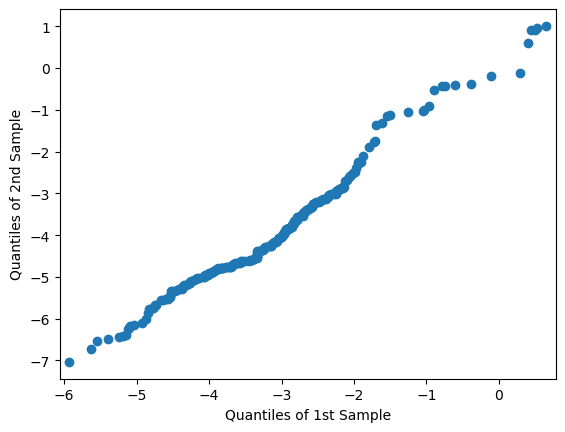

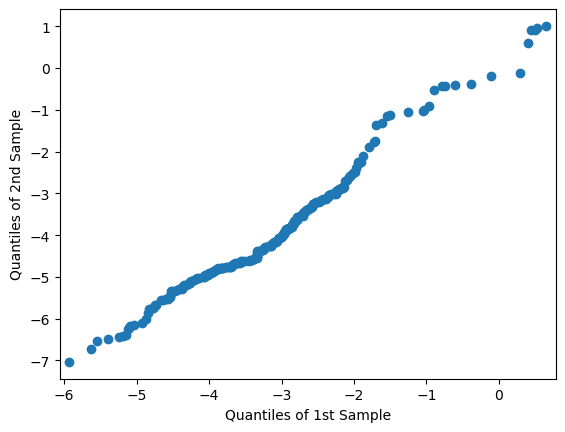

In [60]:
qqplot_2samples(bl_df_nan['log10(Leakage [mmol/gDW/h])'],  yeast_df_nan['log10(Leakage [mmol/gDW/h])'])

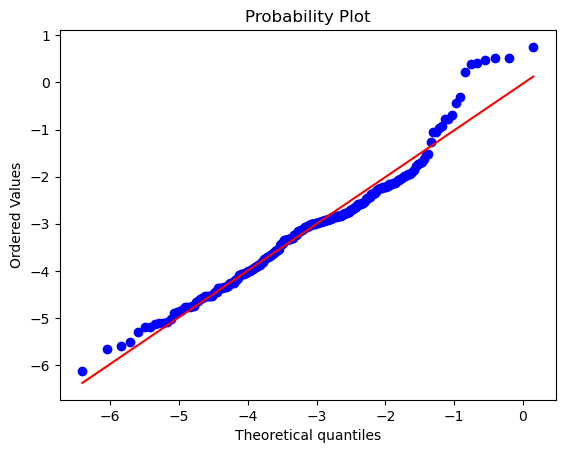

In [63]:
y = bl_df_nan['log10(Leakage [mmol/gDW/h])']
x, (slope, intercept, r2) = st.probplot(y, dist="norm", plot = plt, sparams=(np.mean(y), np.std(y)))

## Goodness of fit

In [64]:
st.goodness_of_fit(st.norm, st.norm.rvs(size = len(pos_sp), loc = 2, scale = 3))

GoodnessOfFitResult(fit_result=  params: FitParams(loc=1.9045497672256269, scale=3.0621451893944354)
 success: True
 message: 'The fit was performed successfully.', statistic=0.7819935313883661, pvalue=0.0434, null_distribution=array([0.30592878, 0.59211191, 0.26768178, ..., 0.16630994, 0.27580583,
       0.25532699]))

In [113]:
# st.goodness_of_fit(st.norm, np.log10(pos_sp))
y = (np.log10(pos_sp)-np.mean(np.log10(pos_sp)))/np.std(np.log10(pos_sp))
print(np.mean(y), np.std(y))
st.goodness_of_fit(st.norm, y, statistic = 'ks')
# st.goodness_of_fit(st.norm, pos_sp, statistic = 'ks')

-7.513291767856045e-17 0.9999999999999999


GoodnessOfFitResult(fit_result=  params: FitParams(loc=-7.513291767856045e-17, scale=1.000377857561189)
 success: True
 message: 'The fit was performed successfully.', statistic=0.10849798632617885, pvalue=0.0001, null_distribution=array([0.01415887, 0.01577058, 0.01373521, ..., 0.01543163, 0.01384391,
       0.0129152 ]))

<AxesSubplot:ylabel='Count'>

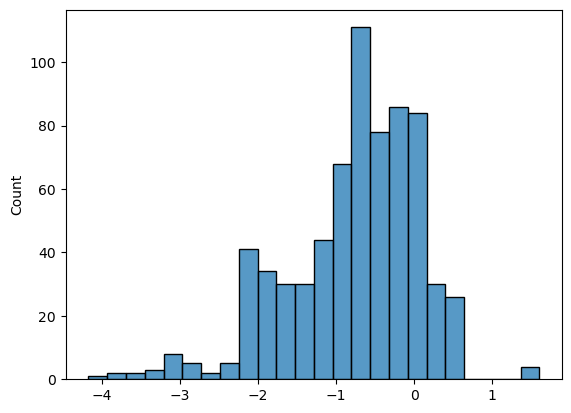

In [71]:
sns.histplot(np.log10(pos_sp))

In [ ]:
data = ec_df_nan['log10(Leakage [mmol/gDW/h])']
res = st.goodness_of_fit(st.gamma,data)
res.fit_result.plot()

<AxesSubplot:title={'center':'Fitted $\\tt norm$ PDF and Histogram'}, xlabel='x', ylabel='PDF'>

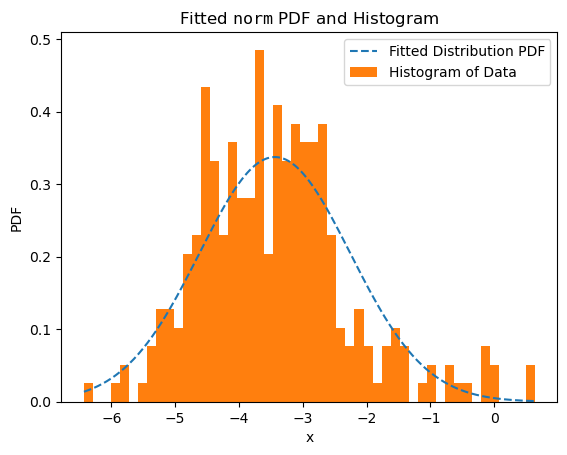

In [467]:
data = ec_df_nan['log10(Leakage [mmol/gDW/h])']
res = st.goodness_of_fit(st.norm,data)
res.fit_result.plot()

# Shadow prices
- The normaltest test whether one should reject the H0 hypothesis: this data comes from a normal disitrbution. However, with large samples sizes it becomes very stric,rejecting almost anythin, thus use probability/QQ plots

# E. coli

In [64]:
model = cobra.io.read_sbml_model('../models/e_coli/momentiJO1366.xml')


Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-26


In [65]:
sps = leakage.estimate_shadow_prices(model,True, delta = 0.01)

In [66]:
# s = cobra.flux_analysis.pfba(model)
s = model.optimize()

In [69]:
#pos_sp = [-x for x in s.shadow_prices if x < 0]
pos_sp = [-x for _, x in sps.items() if x < -1e-10]


NormaltestResult(statistic=69.6396852722015, pvalue=7.549783231611882e-16)


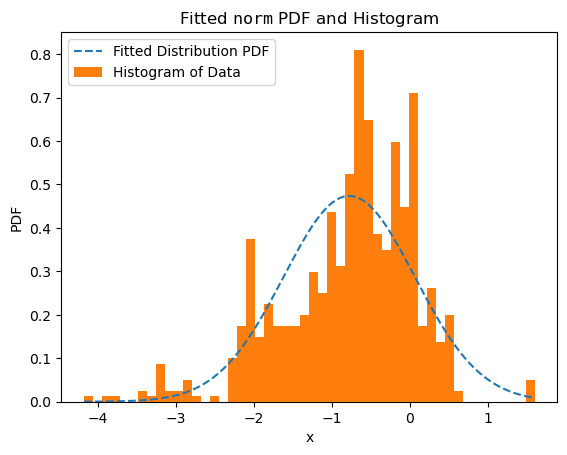

In [70]:
dist = st.norm
ec_fit2 = st.fit(dist, np.log10(pos_sp), bounds=[[-6, 0], [0, 10]])
ec_fit2.plot()
ec_norm2 = st.normaltest(np.log10(pos_sp))
print(ec_norm2)

NormaltestResult(statistic=69.6396852722015, pvalue=7.549783231611882e-16)


/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1636: RuntimeWarning: overflow encountered in true_divide
  x = asarray((x-loc) / scale)


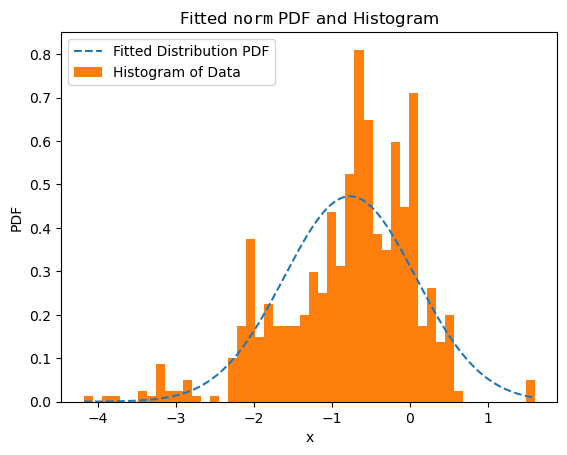

In [77]:
dist = st.norm
ec_fit2 = st.fit(dist, np.log10(pos_sp), bounds=[[-6, 0], [0, 10]])
ec_fit2.plot()
ec_norm2 = st.normaltest(np.log10(pos_sp))
print(ec_norm2)

<AxesSubplot:ylabel='Density'>

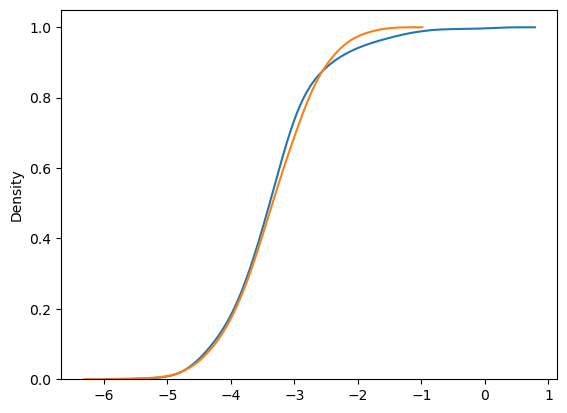

In [409]:
sns.kdeplot(data = np.log10(pos_sp), cumulative = True, label = "X1")
sns.kdeplot(data = st.norm.rvs(size = 1000, loc = -3.34, scale = 0.7), cumulative = True, label = "X1")


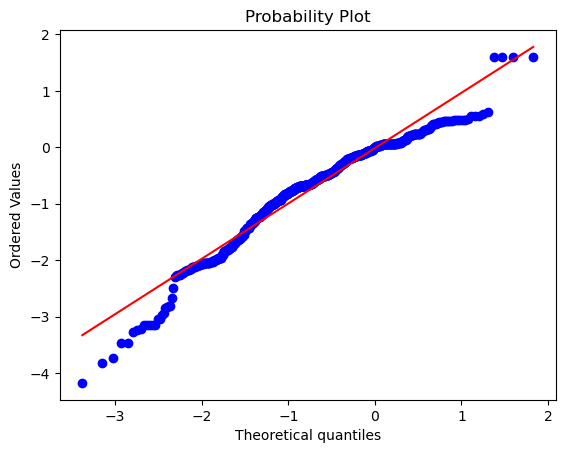

In [71]:
y = np.log10(pos_sp)
x, (slope, intercept, r2) = st.probplot(y, dist="norm", plot = plt, sparams=(np.mean(y), np.std(y)))

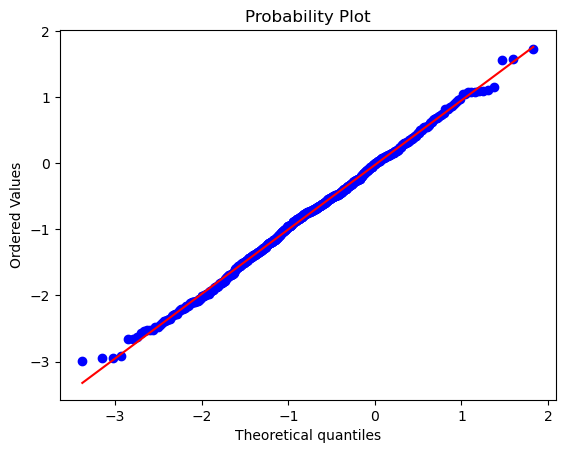

In [72]:
y = np.log10(pos_sp)
x, (slope, intercept, r2) = st.probplot(st.norm.rvs(size = len(y), loc = np.mean(y), scale = np.std(y)), dist="norm", plot = plt, sparams=(np.mean(y), np.std(y)))

In [461]:
deviation_from_dist = np.sqrt(np.sum((x[0]-x[1])**2)/len(x[0]))
print(deviation_from_dist)

0.07889451946833119


In [404]:
st.kurtosis(np.log10(pos_sp))

2.3308443750069214

In [354]:
st.kstest(np.log10(pos_sp), st.norm.cdf, args = (np.mean(np.log10(pos_sp)), np.std(np.log10(pos_sp))))
# st.kstest(st.norm.rvs(size = 1000, loc = 10, scale = 2), st.norm.cdf, args = (10, 2))

KstestResult(statistic=0.10478149285253957, pvalue=0.0003278943561449346, statistic_location=-3.062130780381566, statistic_sign=1)

In [188]:
fluxes = np.abs([x for x in s.fluxes if np.abs(x) >1e-6])
print(len(fluxes), np.min(fluxes), np.max(fluxes))

455 1.485950772872613e-06 37.56459198484706


NormaltestResult(statistic=18.10937393955003, pvalue=0.00011684211606981168)


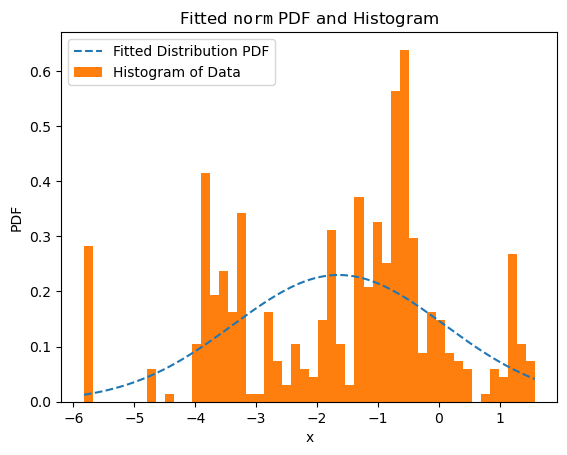

In [191]:
ec_fit_fluxes = st.fit(dist, np.log10(fluxes), bounds=[[-6, 0], [0, 10]])
ec_fit_fluxes.plot()
ec_norm_fluxes = st.normaltest(np.log10(fluxes))
print(ec_norm_fluxes)

In [201]:
turnover_list = []
sp_list = []
for m_id in mc:
    m = model.metabolites.get_by_id(m_id)
    try:
        sp_list.append(sps[m.id])
    except KeyError:
        continue
    turnover_list.append(m.summary(s).producing_flux['flux'].sum())


In [225]:
df = pd.DataFrame()
df['Turnover'] = turnover_list
df['Sp'] = sp_list

In [228]:
df = df.loc[~df.isna().any(1),:]
df = df.loc[~(df.Sp >= 0),:]

In [229]:
df

,Turnover,Sp
0,0.985922,-0.724261
1,0.000000,-0.534850
2,0.000000,-0.636548
3,0.000000,-0.965062
4,0.000000,-0.744162
...,...,...
1030,0.181075,-0.161523
1031,0.000000,-0.206728
1032,0.000000,-0.151125
1033,0.576569,-0.007676


(-6.0, 4.0)

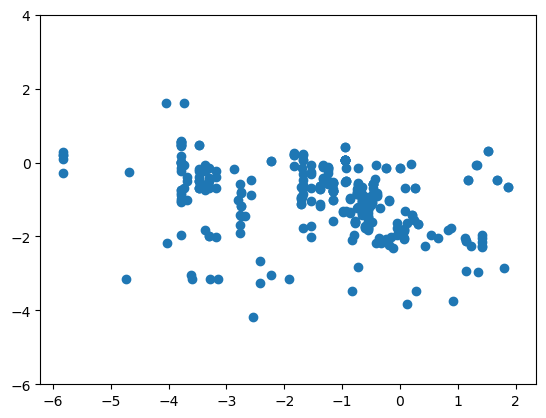

In [236]:
plt.scatter(np.log10(df['Turnover']), np.log10(-df['Sp']))
plt.ylim(-6,4)

NormaltestResult(statistic=16.868992873095408, pvalue=0.00021724247399750108)


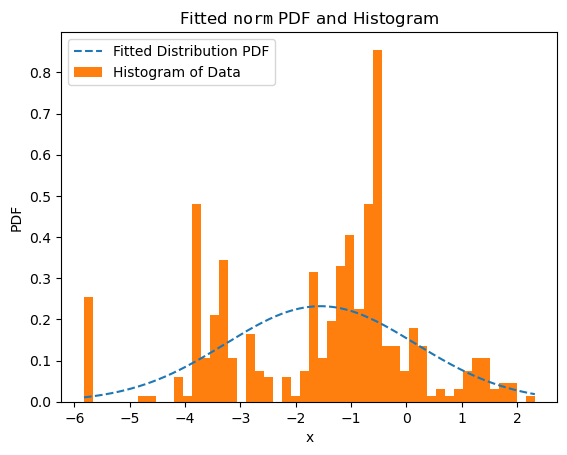

In [198]:
ec_fit_TO = st.fit(dist, np.log10(turnover_list), bounds=[[-6, 0], [0, 10]])
ec_fit_TO.plot()
ec_norm_TO = st.normaltest(np.log10(turnover_list))
print(ec_norm_TO)

In [74]:
model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.objective_coefficient = 0

In [77]:
mc = [m.id for m in model.metabolites if m.id[-1]=='c']

In [92]:
data = []
for m_id in mc:
# model.reactions.ATPM.lower_bound = 0
    with model as M:
        M.reactions.BIOMASS_Ec_iJO1366_core_53p95M.objective_coefficient = 0
        # M.reactions.ATPM.lower_bound = 0
        met = M.metabolites.get_by_id(m_id)
        try:
            r_dm = M.add_boundary(met, 'demand')
        except ValueError:
            continue
            
        r_dm.objective_coefficient = 1
        sol = M.optimize()
        # print(met.name, M.summary())
        # print(sol.fluxes[r_dm.id])
        if sol.objective_value > 0:
            pos_sp = [-x for x in sol.shadow_prices[mc] if x < -1e-10]
            # ec_fitM = st.fit(dist, np.log(pos_sp), bounds=[[-6, 0], [0, 10]])
            # ec_fitM.plot()
            try:
                y = (np.log10(pos_sp)-np.mean(np.log10(pos_sp)))/np.std(np.log10(pos_sp))
                ec_normM = st.anderson(y, 'norm')
            except ZeroDivisionError:
                continue
            data.append(ec_normM)

/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_9504/1364733111.py:22: RuntimeWarning: invalid value encountered in true_divide
  y = (np.log10(pos_sp)-np.mean(np.log10(pos_sp)))/np.std(np.log10(pos_sp))
/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_9504/1364733111.py:22: RuntimeWarning: invalid value encountered in true_divide
  y = (np.log10(pos_sp)-np.mean(np.log10(pos_sp)))/np.std(np.log10(pos_sp))
/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ssulhe

In [93]:
with model as M:
    M.reactions.BIOMASS_Ec_iJO1366_core_53p95M.objective_coefficient = 1
    # M.reactions.ATPM.lower_bound = 0
    sol = M.optimize()
    # print(met.name, M.summary())
    # print(sol.fluxes[r_dm.id])
    pos_sp = [-x for x in sol.shadow_prices[mc] if x < -1e-10]
                
    y = (np.log10(pos_sp)-np.mean(np.log10(pos_sp)))/np.std(np.log10(pos_sp))
    # ec_normM = st.ks_1samp(y, st.norm.cdf)#goodness_of_fit(st.norm, y, statistic = 'ks')
    ec_normM = st.anderson(y, 'norm')

In [94]:
ec_normM.statistic

10.845615033495278

In [95]:
scores = [x.statistic for x in data]

In [96]:
pvals = [x.pvalue for x in data]

AttributeError: 'AndersonResult' object has no attribute 'pvalue'

Text(0.5, 0, 'Anderson normality score')

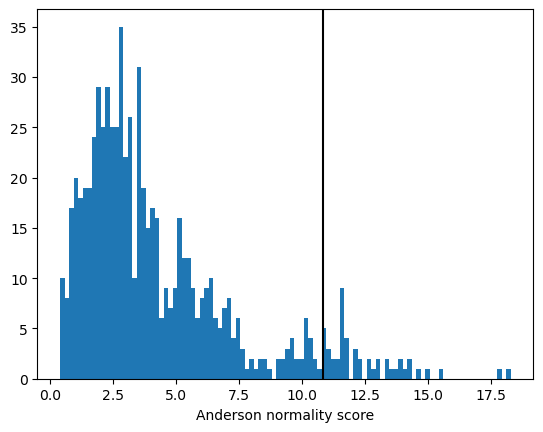

In [97]:
plt.hist(scores, 100)
plt.axvline(ec_normM.statistic, c = 'k')
plt.xlabel("Anderson normality score")

In [89]:
plt.hist(np.log(pvals), 100)
# plt.axvline(70, c = 'k')
plt.xlim(-20,0)

NameError: name 'pvals' is not defined

# Turnover vs shadow price

In [ ]:
leakage.

In [ ]:
i = np.random.randint(0, len(model.metabolites))
# model.reactions.ATPM.lower_bound = 0
with model as M:
    # met = M.metabolites[i]
    # r_dm = M.add_boundary(met, 'demand')
    # r_dm.objective_coefficient = 1
    # sol = M.optimize()
    print(met.name, M.summary())
    print(sol.fluxes[r_dm.id])
    if sol.objective_value > 0:
        pos_sp = [-x for x in sol.shadow_prices if x < 0]
        ec_fitM = st.fit(dist, np.log(pos_sp), bounds=[[-6, 0], [0, 10]])
        ec_fitM.plot()
        ec_normM = st.normaltest(np.log(pos_sp))
        print(ec_normM)

In [50]:
ec_fit.params.loc

-3.4320615321016774

In [56]:
ec_norm = st.normaltest(ec_df_nan['log10(Leakage [mmol/gDW/h])'])
ec_norm.pvalue


4.88242969015857e-07

In [14]:
x = st.norm.rvs(size = 100, loc = 100, scale = 10)

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

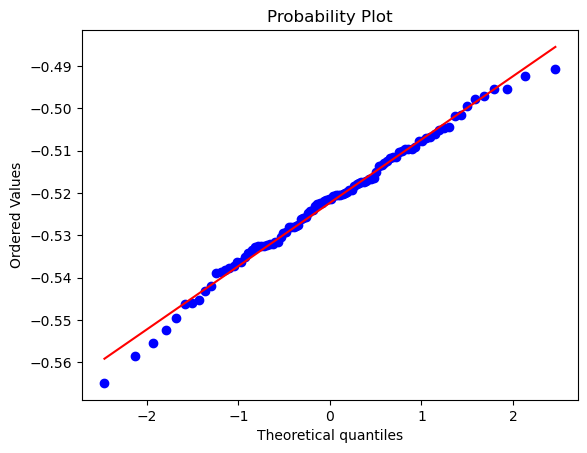

In [19]:
st.probplot(np.log10(np.log10(np.log10(x))), plot = plt)

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

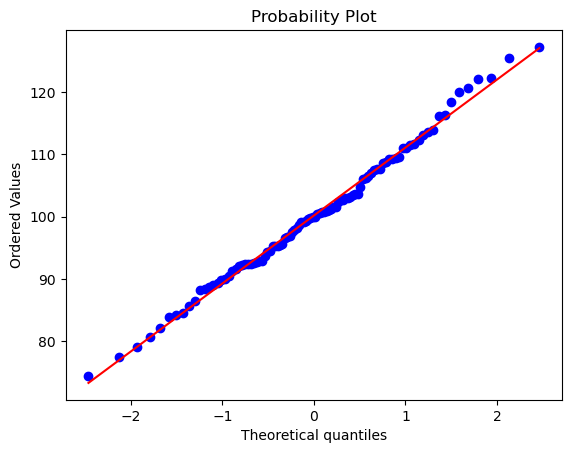

In [20]:
st.probplot(x, plot = plt)